In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import xgboost as xgb

In [2]:
#pip install xgboost

In [3]:
df=pd.read_csv("Invistico_Airline.csv")

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df.dropna()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [9]:
categorical_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class','Seat comfort', 
                        'Departure/Arrival time convenient', 'Food and drink','Gate location', 'Inflight wifi service', 
                        'Inflight entertainment','Online support', 'Ease of Online booking', 'On-board service',
                        'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness','Online boarding']

In [10]:
for i in categorical_features:
    print(df[i].value_counts())
    print('#' * 50 + '\n')
   
    

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
##################################################

Female    65899
Male      63981
Name: Gender, dtype: int64
##################################################

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
##################################################

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
##################################################

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
##################################################

3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
##################################################

4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64
##################################################

3    28150
4    27216
2   

In [11]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Since rating "0" is assigned by a minimal number of passengers, it can be combined with rating "1"

In [12]:
mapping_dictionary = {'Seat comfort': {0: 1},'Departure/Arrival time convenient': {0: 1},'Food and drink': {0: 1},
           'Gate location': {0: 1},'Inflight wifi service': {0: 1},'Inflight entertainment': {0: 1},
           'Online support': {0: 1},'Ease of Online booking': {0: 1},'On-board service': {0: 1},'Leg room service': {0: 1},
           'Baggage handling': {0: 1},'Checkin service': {0: 1},'Cleanliness': {0: 1},'Online boarding': {0: 1}}



In [13]:
df.replace(mapping_dictionary,inplace=True)

In [14]:
for i in categorical_features:
    print(df[i].value_counts())
    print('#' * 50 + '\n')

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
##################################################

Female    65899
Male      63981
Name: Gender, dtype: int64
##################################################

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
##################################################

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
##################################################

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
##################################################

3    29183
2    28726
4    28398
1    25746
5    17827
Name: Seat comfort, dtype: int64
##################################################

4    29593
1    27492
5    26817
3    23184
2    22794
Name: Departure/Arrival time convenient, dtype: int64
##################################################

3    28150
4    27216
2    27146
1    27021
5   

In [15]:
# Numerical columns
numerical_features = ["Age", "Flight Distance", "Departure Delay in Minutes", 'Arrival Delay in Minutes']

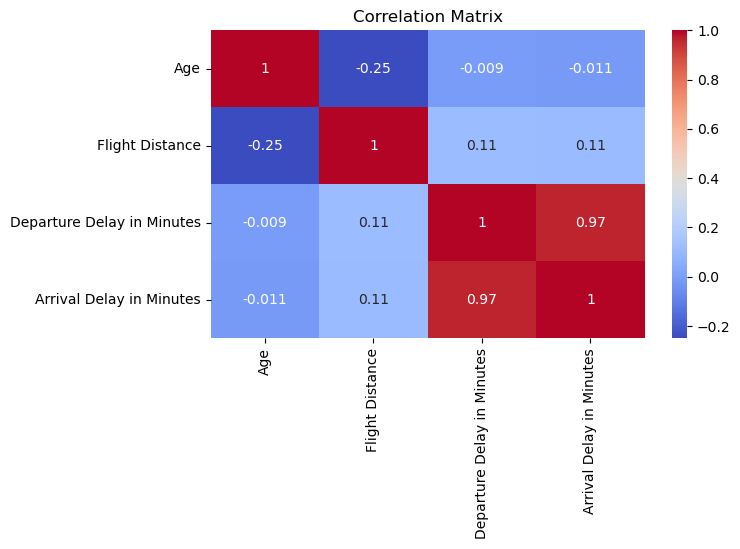

In [16]:
plt.figure(figsize=(7,4))
numerical_features_corr=df[numerical_features].corr()
sns.heatmap(numerical_features_corr,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


From correlation matrix we see that Arrival Delay in Minutes is highly correlated with Departure Delay in Minutes so we can drop one of this feature

In [17]:
df.drop("Arrival Delay in Minutes",axis=1,inplace=True)

In [18]:
# List of rating features to be considered for analysis
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']

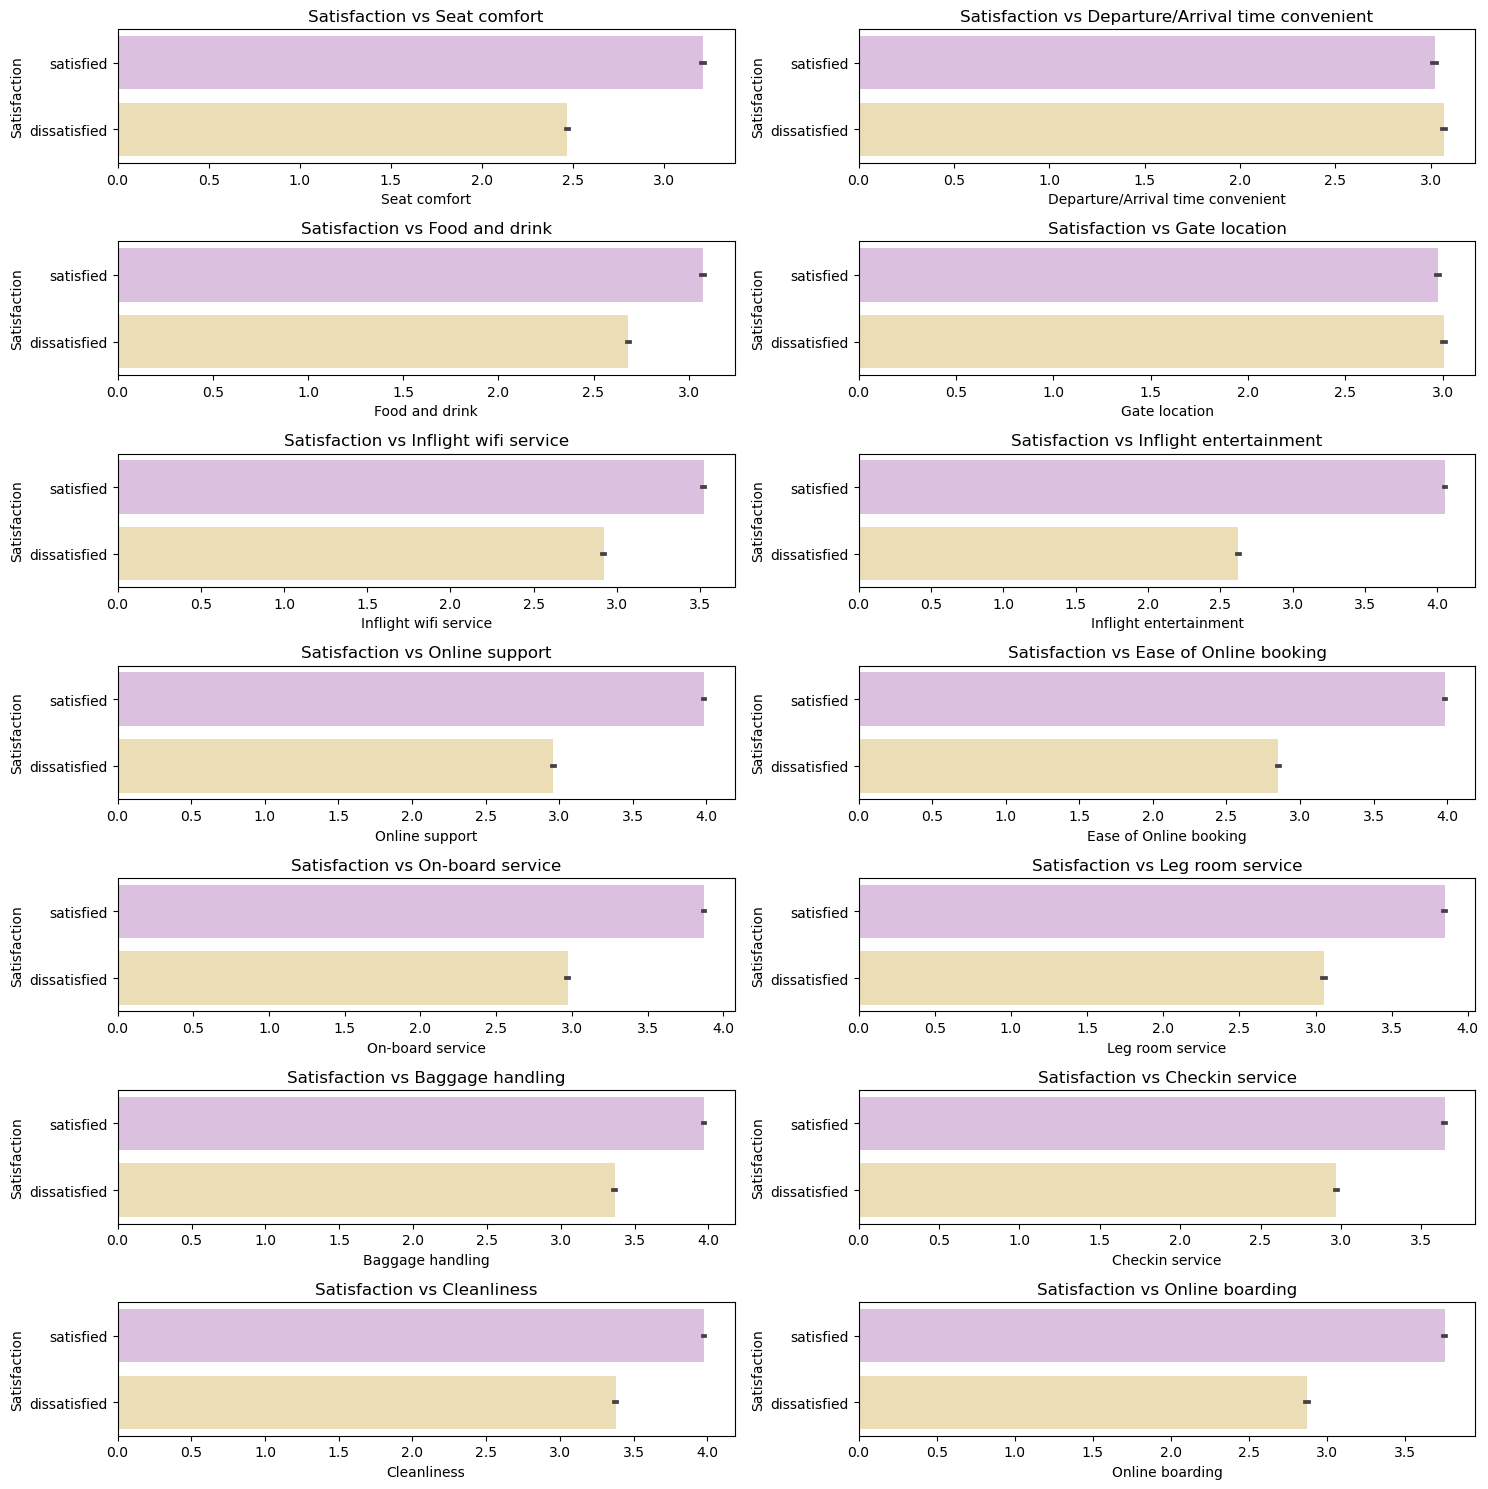

In [19]:
fig,axes=plt.subplots(nrows=7,ncols=2,figsize=(15,15))
for  i,feature in enumerate(rating_features):
    row,col = divmod(i,2)
    sns.barplot(x=feature,y="satisfaction",data=df,ax=axes[row,col],palette=['#E0BBE4','#F4E1AC'])
    axes[row,col].set_title(f'Satisfaction vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Satisfaction')
plt.tight_layout()
plt.show()



The data suggests that Ease of online booking, Inflight entertainment emerge as crucial factors influencing overall passenger satisfaction. This is evident as the average ratings for these aspects are notably higher among satisfied passengers compared to dissatisfied ones, indicating that those pleased with the service tend to rate these features more favorably.
Furthermore, Online support, Seat comfort, On-board service, Online boarding, Leg room service rank closely behind "Inflight entertainment" in terms of significance.

Conversely, factors such as Gate location and Arrival/Departure time convenience do not appear to significantly distinguish between overall satisfied and dissatisfied passengers.

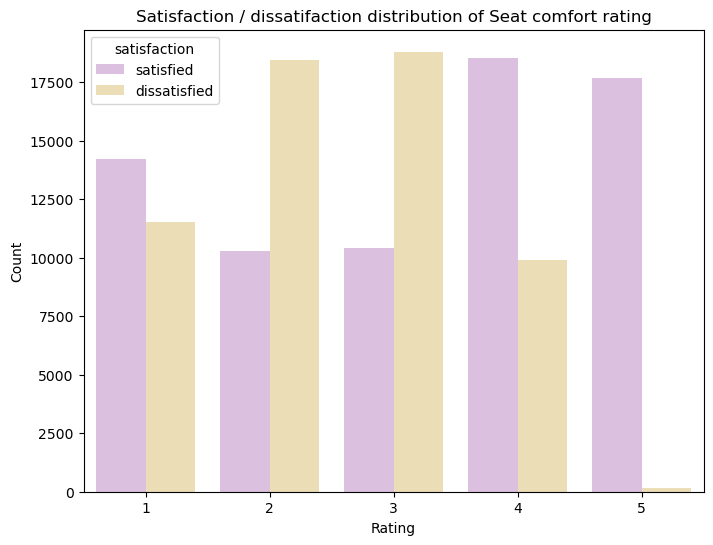

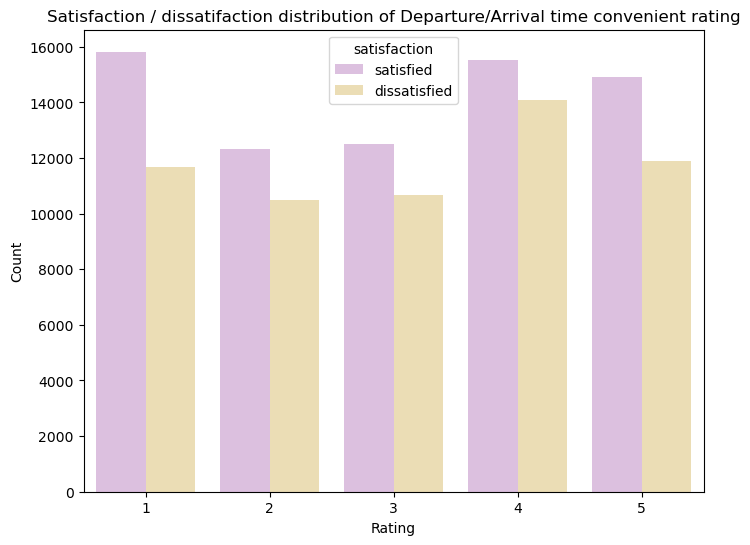

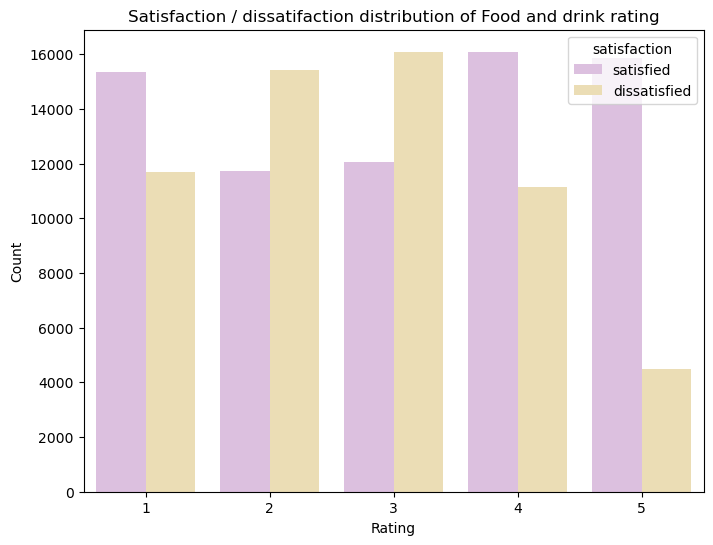

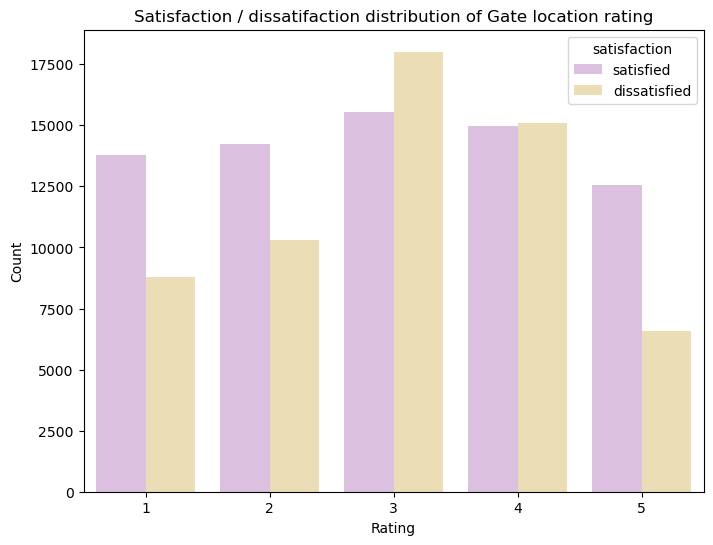

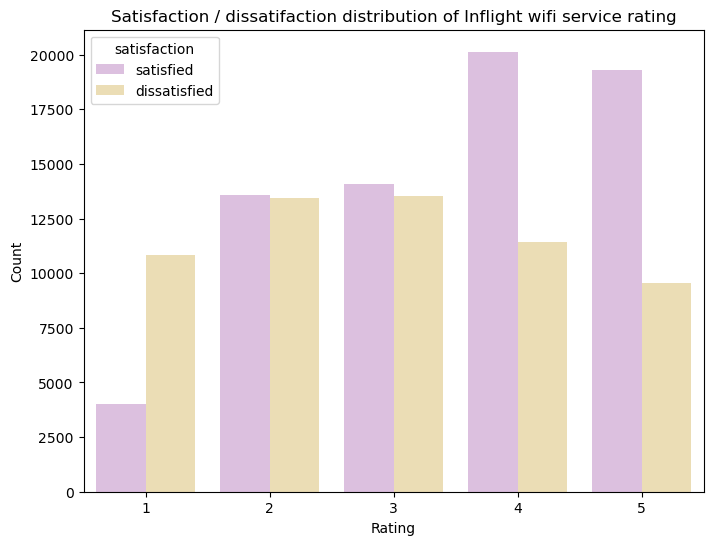

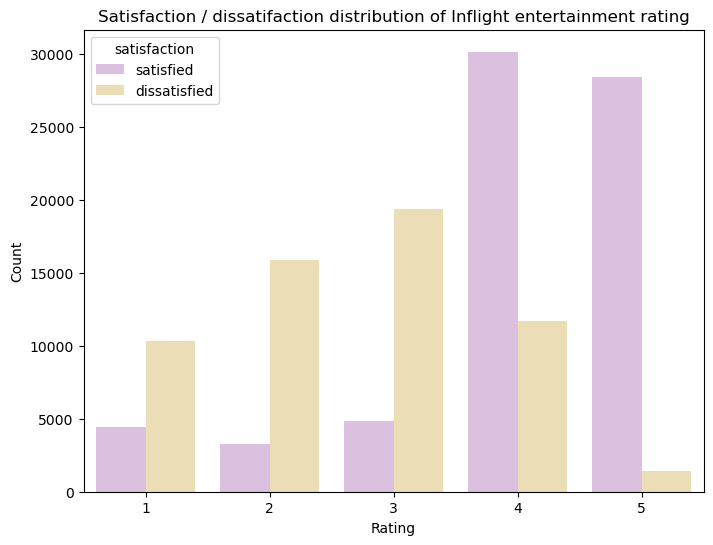

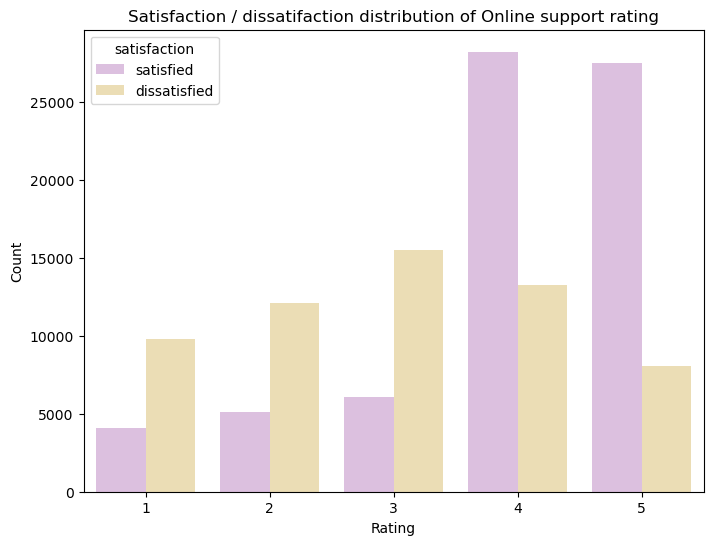

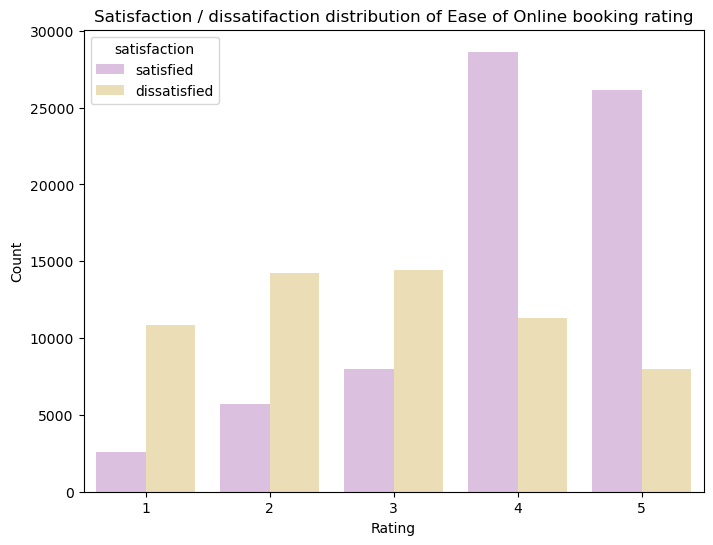

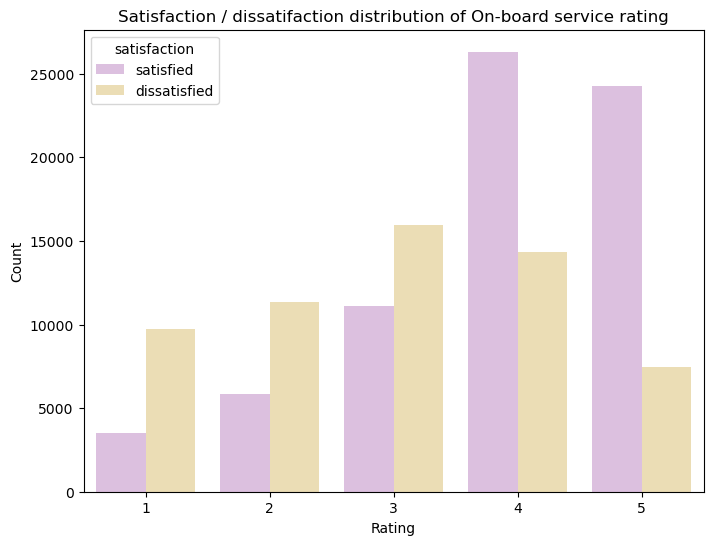

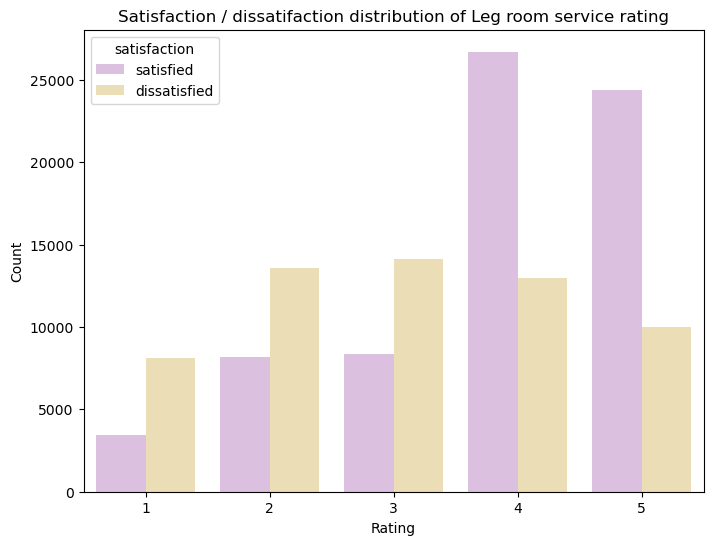

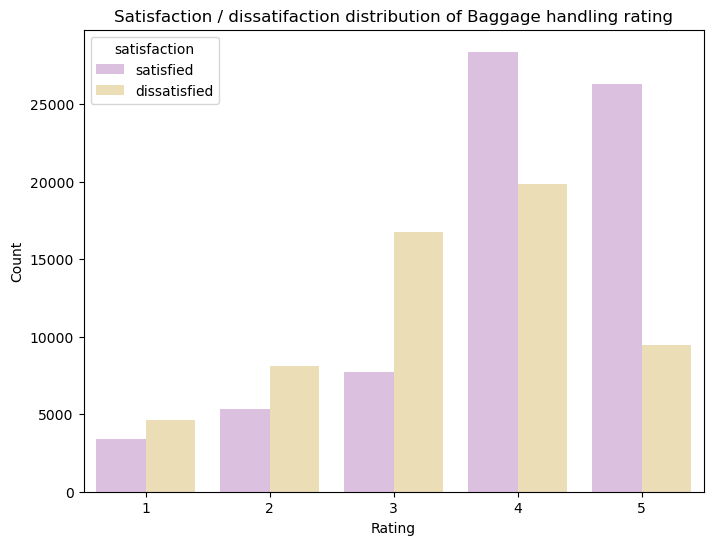

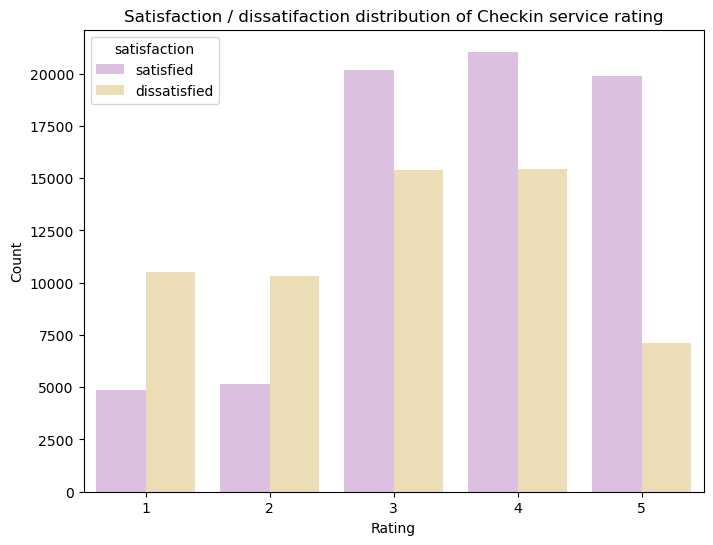

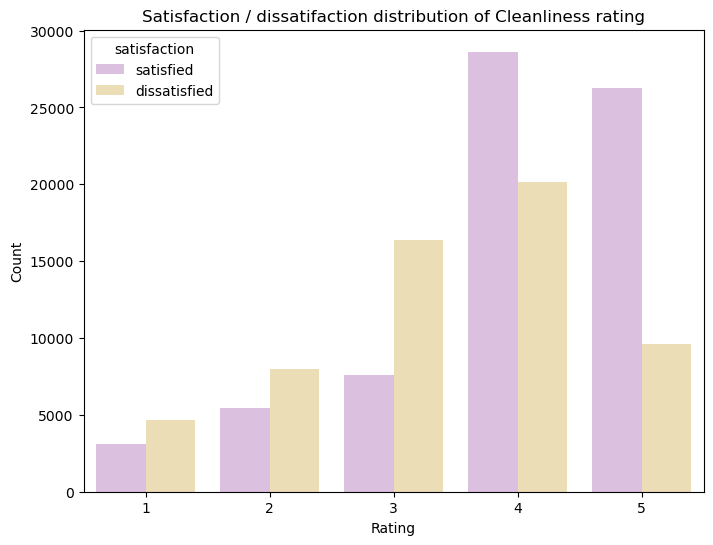

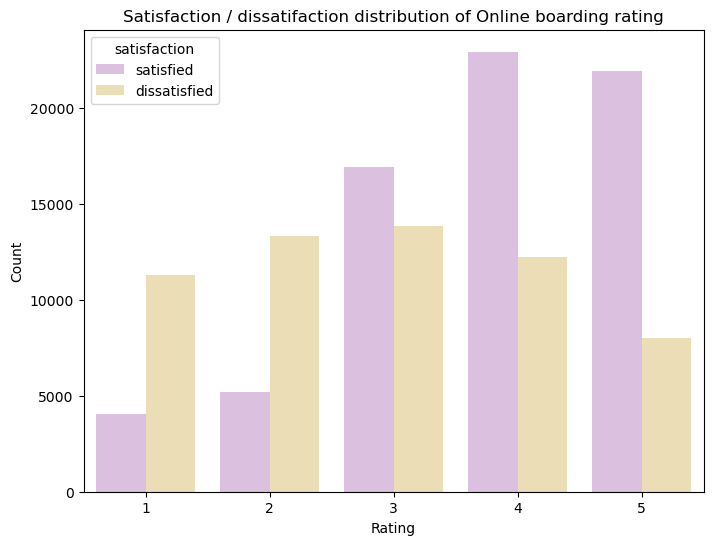

In [20]:
for col in rating_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,hue='satisfaction',palette=['#E0BBE4','#F4E1AC'])
    plt.title('Satisfaction / dissatifaction distribution of {} rating'.format(col))
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

In these visualizations, we explore customer satisfaction by analyzing their provided ratings. Notably, for 'Inflight entertainment,' we find that the majority of customers giving ratings of 4 and 5 are highly satisfied. Especially noteworthy is that those rating 5 are almost exclusively satisfied, indicating a lack of dissatisfaction in this category. Conversely, customers rating 1, 2, or 3 tend to express dissatisfaction, underscoring how ratings for 'Inflight entertainment' closely reflect satisfaction levels.

Similarly, when examining 'Seat comfort,' 'Online support,' 'Ease of Online booking,' 'On-board service,' 'Leg room service,' and 'Online boarding,' we observe that most customers providing ratings of 4 or 5 indicate satisfaction, unlike those giving lower ratings. This implies that these factors significantly contribute to determining customer satisfaction.

On the contrary, 'Departure/Arrival time convenient' and 'Gate location' do not display a clear pattern in their ratings. For instance, 50% of customers giving a rating of "4" express satisfaction while the other 50% do not. This suggests a limited impact of these features on overall satisfaction.

In summary, the distribution of customer ratings across various features demonstrates differing degrees of influence on satisfaction levels. 'Inflight entertainment' holds the highest importance, followed by 'Seat comfort' and 'Online support,' whereas the remaining features show less pronounced effects.

In conclusion, we propose the following recommendations:

Enhance Inflight Entertainment: Given its significant impact on satisfaction, improving inflight entertainment options could greatly benefit customer experience.

Prioritize Seat Comfort: Focusing on improving seat comfort can further elevate satisfaction levels among passengers.

Strengthen Online Support: Maintaining robust online support services is crucial, as they contribute positively to overall satisfaction.

Monitor and Improve Other Features: While other features show less pronounced effects, they should not be overlooked. Continuous monitoring and incremental improvements across all aspects of airline service are essential to maintaining overall satisfaction.

These recommendations are drawn from our analysis of the correlation between customer ratings and satisfaction levels for each feature, providing guidance for efforts to enhance customer experience and satisfaction

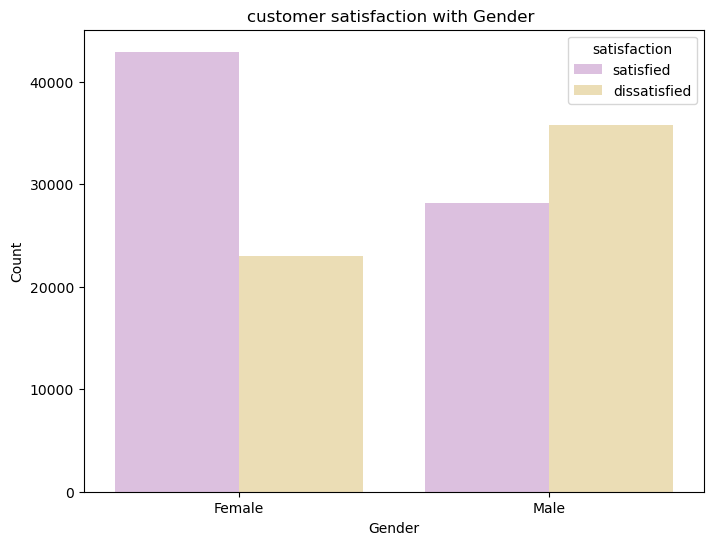

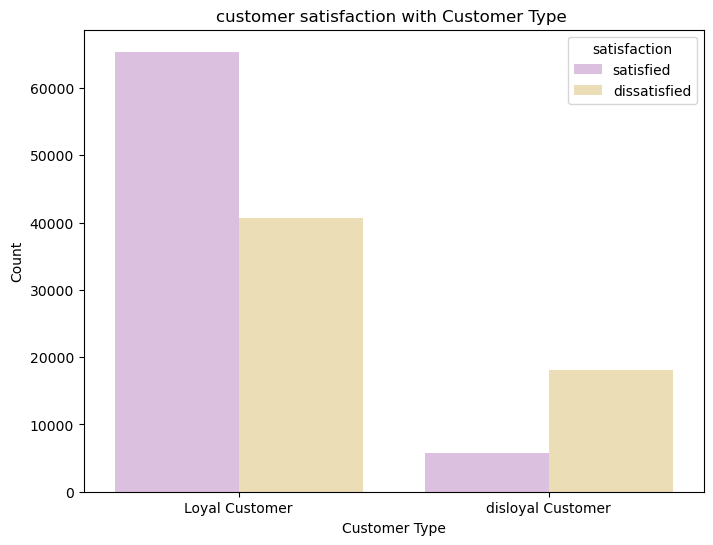

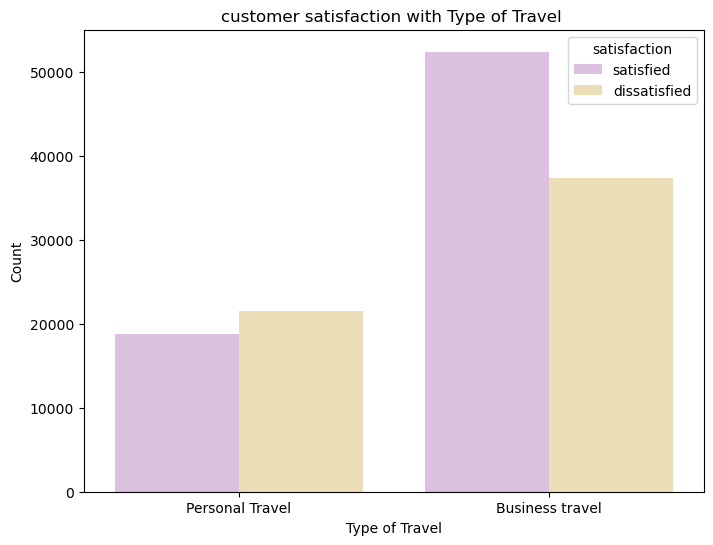

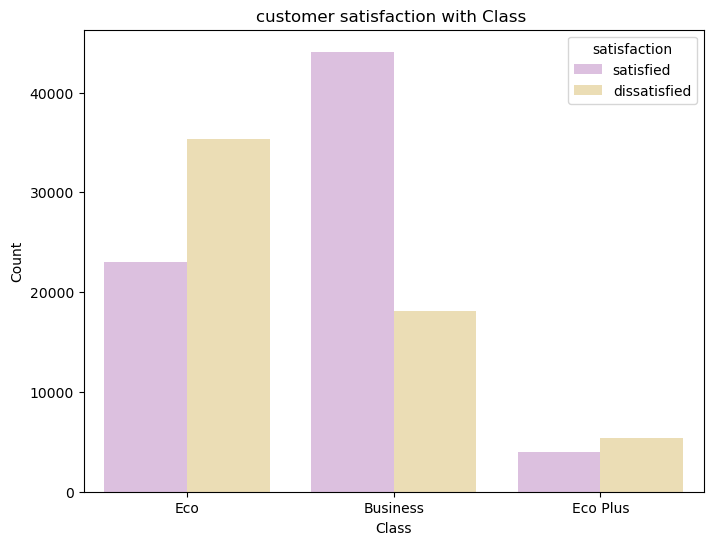

In [21]:
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,hue='satisfaction',palette=['#E0BBE4','#F4E1AC'])
    plt.title('customer satisfaction with {} '.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Female passengers tend to express higher satisfaction with flight services compared to male passengers. Additionally, the number of satisfied male passengers is lower than the number of dissatisfied male passengers. This phenomenon could potentially be attributed to various factors such as differences in entertainment preferences between men and women, which require further analysis for a comprehensive understanding.

Among the overall base of loyal customers, a considerable majority express dissatisfaction with the services provided. Notably, within the disloyal customer segment, the number of dissatisfied customers significantly surpasses that of satisfied customers. It is imperative to prioritize the assessment of the proportion of unsatisfied loyal customers, as they represent valuable assets for the airline.

The ratio of content customers in the business class segment notably exceeds that of dissatisfied customers, whereas the opposite trend is observed in the Eco Plus and Economy categories. Factors such as in-flight entertainment, seat comfort, and available legroom may serve as distinguishing features between the business class and the other two classes, warranting further analysis to comprehend underlying reasons.







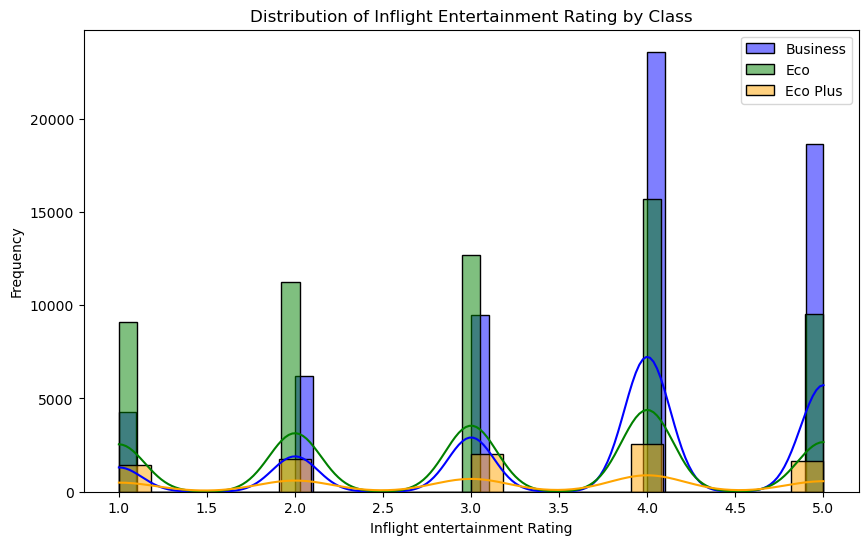

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 'Business']['Inflight entertainment'], label='Business', kde=True, color='Blue')
sns.histplot(df[df['Class'] == 'Eco']['Inflight entertainment'], label='Eco', kde=True, color='Green')
sns.histplot(df[df['Class'] == 'Eco Plus']['Inflight entertainment'], label='Eco Plus', kde=True, color='Orange')
plt.xlabel('Inflight entertainment Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight Entertainment Rating by Class')
plt.legend()
plt.show()

This graph underscores a distinct pattern: passengers in 'Eco' and 'Eco Plus' generally give lower ratings for 'Inflight entertainment,' while those in 'Business' consistently rate it higher. This observation echoes our earlier finding that passengers who rate 'Inflight entertainment' as 5 or 4 tend to be more satisfied.

The reason for the heightened satisfaction among 'Business' passengers becomes clear: they enjoy a broader range of 'Inflight entertainment' services compared to passengers in 'Eco' and 'Eco Plus' classes. This variation in available entertainment options likely explains the differences in satisfaction levels.

In conclusion, we suggest the following actions:

Enhance Inflight Entertainment in Economy Classes: Improve Inflight entertainment offerings in 'Eco' and 'Eco Plus' classes to bring them more in line with the higher-rated 'Business' class and enhance overall customer satisfaction.

Highlight Inflight Entertainment as a Key Feature: Emphasize the availability and quality of Inflight entertainment, particularly in 'Business' class, in marketing and service promotions to attract and retain customers who value this aspect.







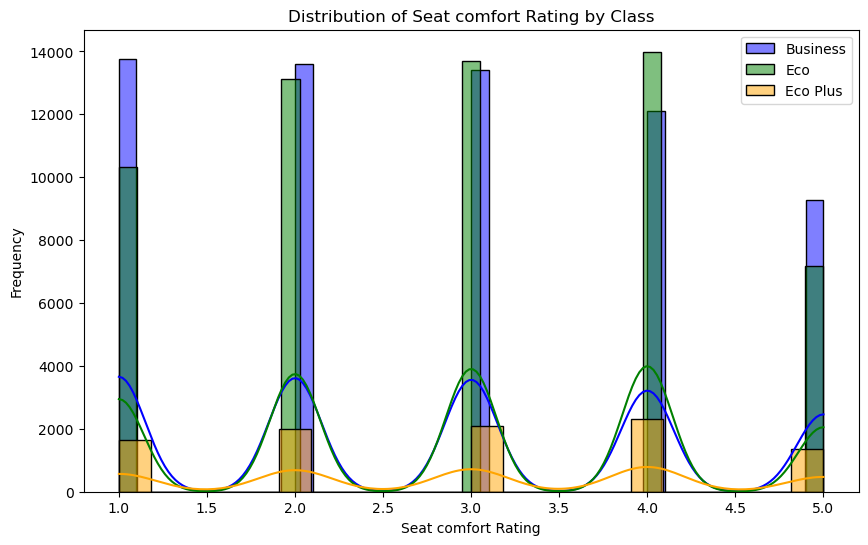

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 'Business']['Seat comfort'], label='Business', kde=True, color='Blue')
sns.histplot(df[df['Class'] == 'Eco']['Seat comfort'], label='Eco', kde=True, color='Green')
sns.histplot(df[df['Class'] == 'Eco Plus']['Seat comfort'], label='Eco Plus', kde=True, color='Orange')
plt.xlabel('Seat comfort Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Seat comfort Rating by Class')
plt.legend()
plt.show()

In business class, seat comfort ratings predominantly fall within the range of 1, 2, or 3. Despite this, the number of satisfied passengers in business class significantly outweighs the dissatisfied ones regarding flight service, indicating that seat comfort isn't the primary factor for discerning between satisfied and dissatisfied passengers in this class.

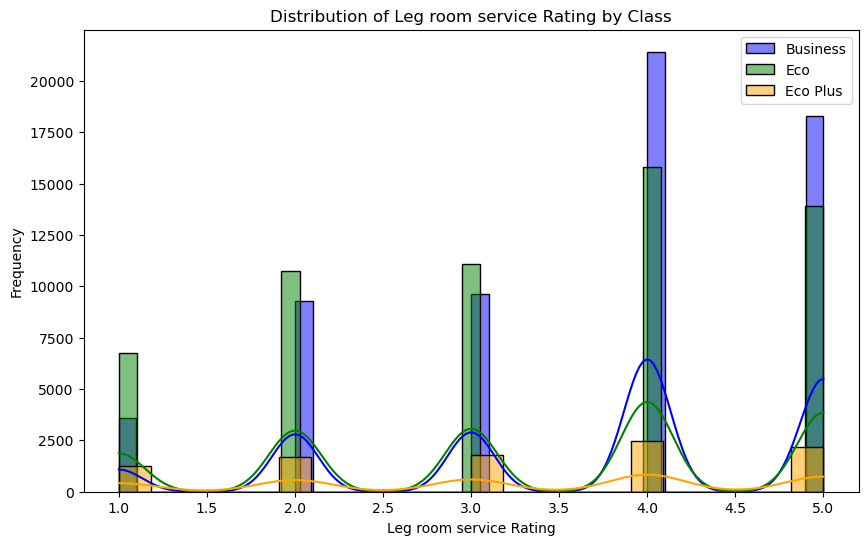

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 'Business']['Leg room service'], label='Business', kde=True, color='Blue')
sns.histplot(df[df['Class'] == 'Eco']['Leg room service'], label='Eco', kde=True, color='Green')
sns.histplot(df[df['Class'] == 'Eco Plus']['Leg room service'], label='Eco Plus', kde=True, color='Orange')
plt.xlabel('Leg room service Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Leg room service Rating by Class')
plt.legend()
plt.show()

From the graph, it's evident that legroom service is a significant factor affecting passenger satisfaction For business class

In the business class category, a majority of passengers assign 4 and 5-star ratings to legroom service, correlating with a high level of satisfaction. However, in the economy and eco plus classes, although a good proportion of passengers rate legroom service positively, there remains a substantial proportion of dissatisfied individuals. This suggests that legroom service may not be the primary reason for dissatisfaction among passengers in these classes

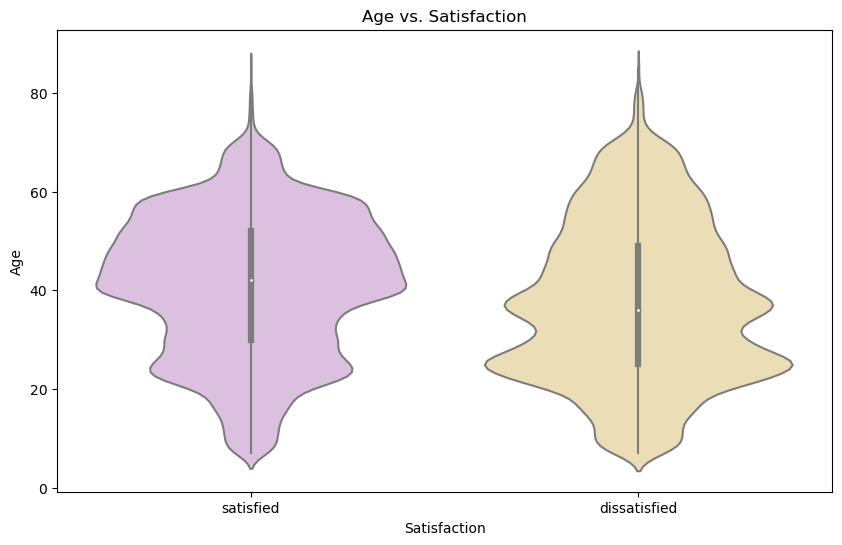

In [26]:
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(x='satisfaction', y='Age', data=df, palette=['#E0BBE4','#F4E1AC'])

# Add labels and title
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Age vs. Satisfaction')

# Show the plot

plt.show()


The violin plot reveals a notable distinction: among satisfied passengers, the majority fall within the 40-60 age category, whereas for dissatisfied passengers, most individuals are aged between 20 and 35 years. This indicates that, on average, younger passengers tend to be more dissatisfied compared to older ones, suggesting that younger individuals have higher expectations regarding flight services than their older counterparts.

<AxesSubplot:xlabel='satisfaction', ylabel='Flight Distance'>

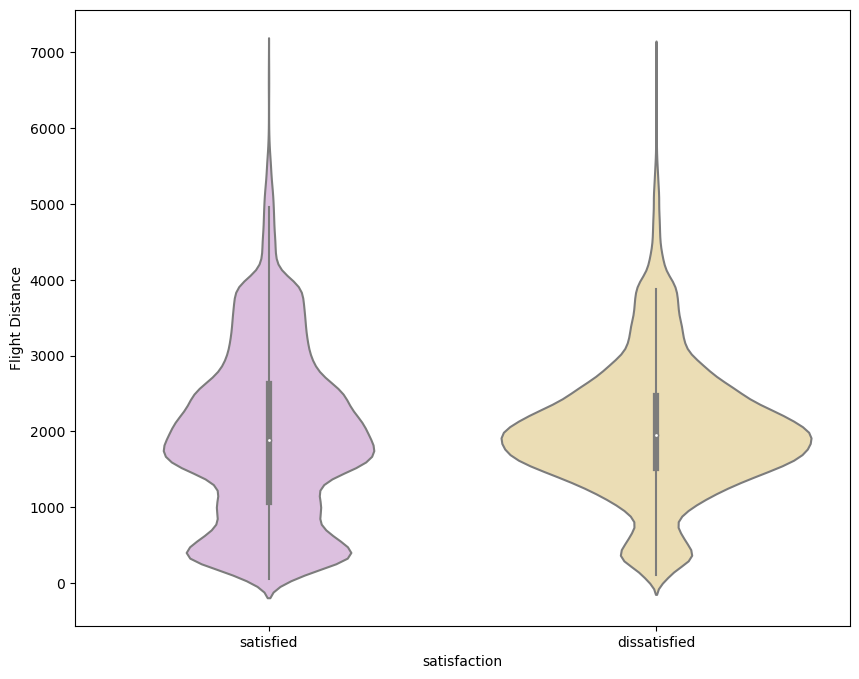

In [29]:
plt.figure(figsize=(10,8))
sns.violinplot(x="satisfaction",y="Flight Distance",data=df,palette=['#E0BBE4','#F4E1AC'])

In [30]:
X = df.drop("satisfaction", axis=1)

In [31]:
df['classification'] = df['satisfaction'].apply(lambda x : 1 if x == "dissatisfied" else 0)
y = df["classification"].copy()

In [32]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [33]:
X=pd.get_dummies(X,columns = ["Gender", "Type of Travel"])

In [34]:
X["Class"].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [35]:
encoders_nums = {"Customer Type":{"Loyal Customer":1,"disloyal Customer":0}}
X = X.replace(encoders_nums)

In [36]:
encoders_nums = {"Class":{"Business":3,"Eco":2,"Eco Plus":1}}
X = X.replace(encoders_nums)

In [37]:
X

,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,2,265,1,1,1,2,2,4,...,1,3,5,3,2,0,1,0,0,1
1,1,47,3,2464,1,1,1,3,1,2,...,4,4,2,3,2,310,0,1,0,1
2,1,15,2,2138,1,1,1,3,2,1,...,3,4,4,4,2,0,1,0,0,1
3,1,60,2,623,1,1,1,3,3,4,...,1,1,4,1,3,0,1,0,0,1
4,1,70,2,354,1,1,1,3,4,3,...,1,2,4,2,5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,2,1731,5,5,5,3,2,5,...,3,4,4,4,2,0,1,0,0,1
129876,0,63,3,2087,2,3,2,4,2,1,...,3,3,1,2,1,174,0,1,0,1
129877,0,69,2,2320,3,1,3,3,3,2,...,3,4,2,3,2,155,0,1,0,1
129878,0,66,2,2450,3,2,3,2,3,2,...,2,3,2,1,2,193,0,1,0,1


In [38]:
selected_features = X[["Age", "Flight Distance", "Departure Delay in Minutes"]]

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(selected_features)

StandardScaler()

In [41]:
selected_features_scaled = scaler.transform(selected_features)

In [42]:
X[["Age", "Flight Distance", "Departure Delay in Minutes"]] = selected_features_scaled

In [43]:
X

,Customer Type,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,1.691351,2,-1.671103,1,1,1,2,2,4,...,1,3,5,3,2,-0.386481,1,0,0,1
1,1,0.500820,3,0.469852,1,1,1,3,1,2,...,4,4,2,3,2,7.756204,0,1,0,1
2,1,-1.615680,2,0.152458,1,1,1,3,2,1,...,3,4,4,4,2,-0.386481,1,0,0,1
3,1,1.360648,2,-1.322552,1,1,1,3,3,4,...,1,1,4,1,3,-0.386481,1,0,0,1
4,1,2.022054,2,-1.584452,1,1,1,3,4,3,...,1,2,4,2,5,-0.386481,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,-0.689712,2,-0.243799,5,5,5,3,2,5,...,3,4,4,4,2,-0.386481,1,0,0,1
129876,0,1.559070,3,0.102804,2,3,2,4,2,1,...,3,3,1,2,1,4.183929,0,1,0,1
129877,0,1.955913,2,0.329653,3,1,3,3,3,2,...,3,4,2,3,2,3.684862,0,1,0,1
129878,0,1.757491,2,0.456222,3,2,3,2,3,2,...,2,3,2,1,2,4.682997,0,1,0,1


In [44]:
# Define a list of models to evaluate
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]


In [45]:
# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over each model and evaluate its accuracy using cross-validation.
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print the mean accuracy score for the current model
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

LogisticRegression: Mean Accuracy = 0.8392265863089661
DecisionTreeClassifier: Mean Accuracy = 0.9213889848759178
RandomForestClassifier: Mean Accuracy = 0.9477209715193402
GradientBoostingClassifier: Mean Accuracy = 0.9151428372672733
XGBClassifier: Mean Accuracy = 0.9479808289009093


RandomForestClassifier and XGBClassifier could be strong candidates for further evaluation or deployment, given their consistently high performance in cross-validation. However, further analysis, such as hyperparameter tuning and evaluation on the test set, would be necessary to make a final model selection

In [55]:
# Initialize the models with the best parameters found during cross-validation
rf_model = RandomForestClassifier()  
xgb_model = xgb.XGBClassifier()  

# Fit the models on the training data
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict on the test data
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the accuracy of the models on the test data
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [56]:
print(f"RandomForestClassifier Accuracy on Test Data: {rf_accuracy}")
print(f"XGBClassifier Accuracy on Test Data: {xgb_accuracy}")

RandomForestClassifier Accuracy on Test Data: 0.9505312596242685
XGBClassifier Accuracy on Test Data: 0.9501847859562673


The RandomForestClassifier achieved an accuracy of approximately 95.05% on the test data, while the XGBClassifier achieved an accuracy of approximately 95.02%. These results indicate that both models generalize well to unseen data and perform similarly on the test set.

Confusion Matrix for RandomForestClassifier:
[[13485   816]
 [  469 11206]]

Confusion Matrix for XGBClassifier:
[[13498   803]
 [  491 11184]]


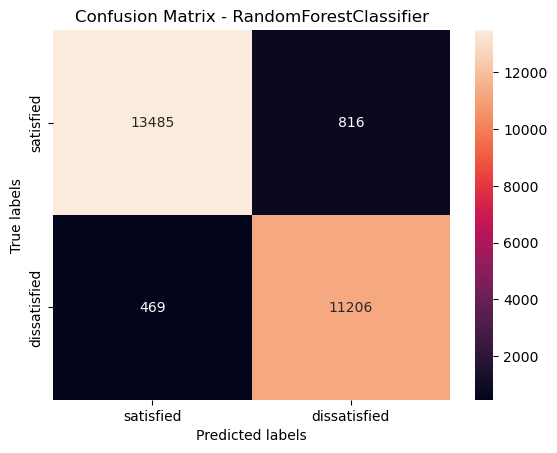

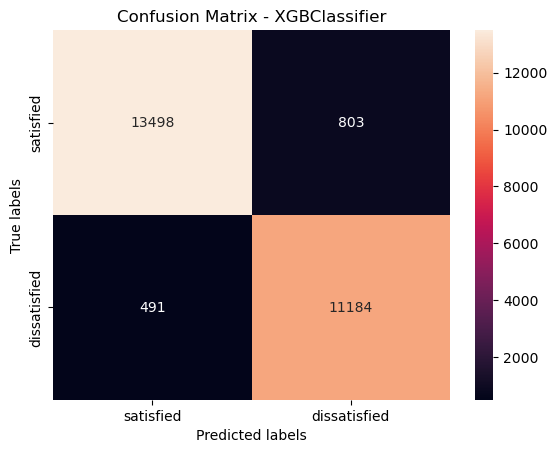

In [57]:
# Confusion matrix for RandomForestClassifier
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix for RandomForestClassifier:")
print(conf_matrix_rf)
plt.figure()
ax_rf = plt.subplot()
sns.heatmap(conf_matrix_rf, annot=True, ax=ax_rf, fmt='d')

# Labels, title, and ticks
ax_rf.set_xlabel('Predicted labels')
ax_rf.set_ylabel('True labels')
ax_rf.set_title('Confusion Matrix - RandomForestClassifier')
ax_rf.xaxis.set_ticklabels(labels)
ax_rf.yaxis.set_ticklabels(labels)

# Confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, xgb_pred)
print("\nConfusion Matrix for XGBClassifier:")
print(conf_matrix_xgb)
plt.figure()
ax_xgb = plt.subplot()
sns.heatmap(conf_matrix_xgb, annot=True, ax=ax_xgb, fmt='d')

# Labels, title, and ticks
ax_xgb.set_xlabel('Predicted labels')
ax_xgb.set_ylabel('True labels')
ax_xgb.set_title('Confusion Matrix - XGBClassifier')
ax_xgb.xaxis.set_ticklabels(labels)
ax_xgb.yaxis.set_ticklabels(labels)

plt.show()

In [59]:
# Classification report for RandomForestClassifier
report_rf = classification_report(y_test, rf_pred, target_names=['satisfied', 'dissatisfied'])
print("Classification Report for RandomForestClassifier:")
print(report_rf)

# Classification report for XGBClassifier
report_xgb = classification_report(y_test, xgb_pred, target_names=['satisfied', 'dissatisfied'])
print("\nClassification Report for XGBClassifier:")
print(report_xgb)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

   satisfied       0.97      0.94      0.95     14301
dissatisfied       0.93      0.96      0.95     11675

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976


Classification Report for XGBClassifier:
              precision    recall  f1-score   support

   satisfied       0.96      0.94      0.95     14301
dissatisfied       0.93      0.96      0.95     11675

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



Both models show similar performance in terms of precision, recall, and F1-score for both classes. They achieve an overall accuracy of approximately 95% on the test data

In [60]:
# AUC score for RandomForestClassifier
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print("AUC Score for RandomForestClassifier:", auc_rf)

# AUC score for XGBClassifier
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])
print("AUC Score for XGBClassifier:", auc_xgb)

AUC Score for RandomForestClassifier: 0.9894189666735393
AUC Score for XGBClassifier: 0.9912371231732796


These scores indicate high performance in terms of distinguishing between positive and negative classes, with the XGBClassifier slightly outperforming the RandomForestClassifier in this regard

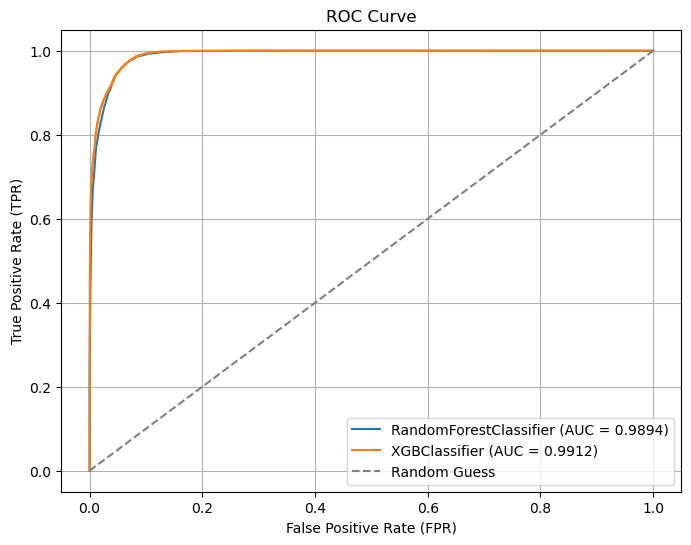

In [62]:
# Calculate ROC curve for RandomForestClassifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)

# Calculate ROC curve for XGBClassifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1], pos_label=1)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='RandomForestClassifier (AUC = {:.4f})'.format(auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBClassifier (AUC = {:.4f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

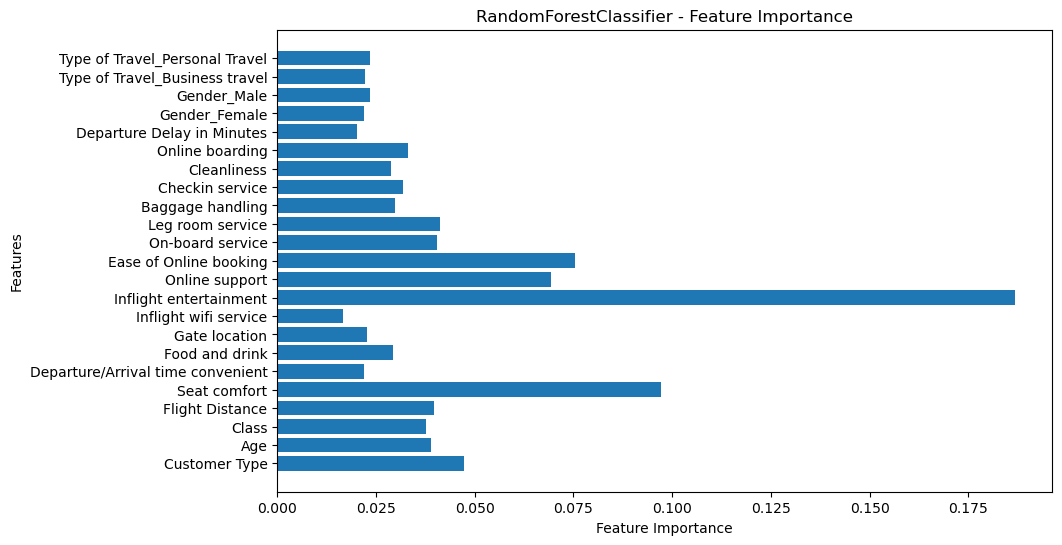

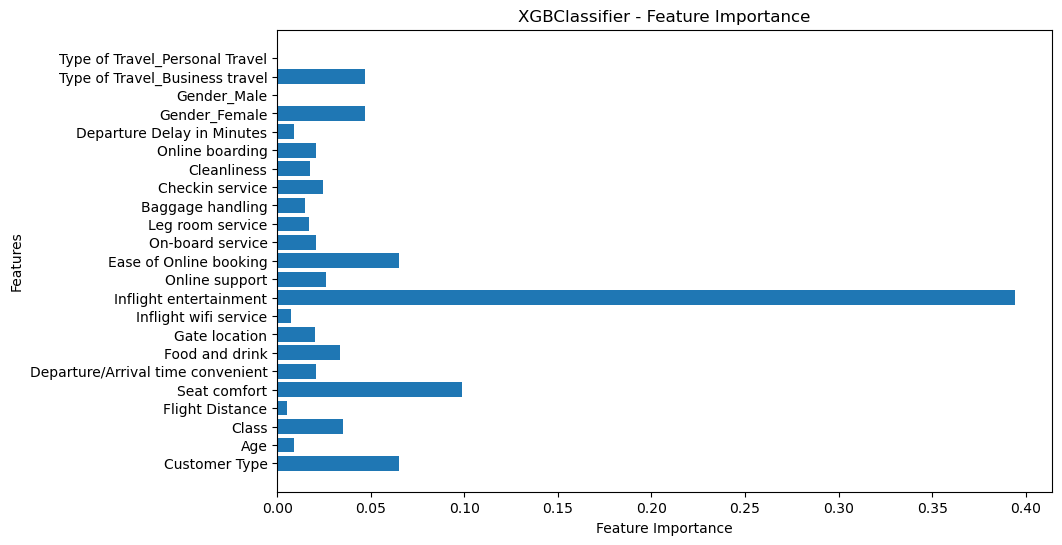

In [63]:
# Feature Importance for RandomForestClassifier
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RandomForestClassifier - Feature Importance')
plt.show()

# Feature Importance for XGBClassifier
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBClassifier - Feature Importance')
plt.show()

Understanding that "Inflight entertainment" is considered the most important parameter according to both models, with seat comfort, ease of online booking, and customer type following closely behind, suggests several insights:

Comprehensive Passenger Experience: The importance of "Inflight entertainment" and "seat comfort" indicates that passengers prioritize both physical comfort and entertainment options during their journey. This suggests that providing a holistic and enjoyable travel experience, encompassing both comfort and entertainment, is crucial for satisfying passengers.

Convenience and Accessibility: The significance of "ease of online booking" suggests that passengers value convenience and efficiency in the booking process. Airlines and booking platforms should prioritize user-friendly interfaces, streamlined processes, and accessibility across devices to enhance customer satisfaction.

Segment-Specific Preferences: The inclusion of "customer type" as an important feature underscores the importance of understanding and catering to the preferences of different passenger segments. Tailoring services and amenities to meet the unique needs and preferences of business travelers, leisure travelers, frequent flyers, etc., can help airlines better serve their diverse customer base.

Opportunities for Differentiation: Recognizing these key features provides airlines with insights into areas where they can differentiate themselves from competitors. Investing in enhancing inflight entertainment systems, improving seat comfort, optimizing online booking experiences, and tailoring services based on customer segments can help airlines stand out and attract more passengers.

Overall, identifying these key features highlights areas where airlines can focus their efforts to enhance customer satisfaction, loyalty, and ultimately, competitiveness in the aviation industry.
